In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data2 = pd.read_csv(r'C:\Users\khyAJ\OneDrive - Rutgers University\Pandas Practice\Bank_Churn.csv')
data2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [5]:
data = data2.copy()

CLEANING DATA

Checking Nan values and imputing or dropping based on dataset

Next, encoding Categorical Variables

Then Standardizing Numerical Features (Scaling)


Column Dictionary: 

Field,Description
CustomerId,A unique identifier for each customer
Surname,The customer's last name
CreditScore,A numerical value representing the customer's credit score
Geography,"The country where the customer resides (France, Spain or Germany)"
Gender,The customer's gender (Male or Female)
Age,The customer's age
Tenure,The number of years the customer has been with the bank
Balance,The customer's account balance
NumOfProducts,"The number of bank products the customer uses (e.g., savings account, credit card)"
HasCrCard,"Whether the customer has a credit card (1 = yes, 0 = no)"
IsActiveMember,"Whether the customer is an active member (1 = yes, 0 = no)"
EstimatedSalary,The estimated salary of the customer
Exited,"Whether the customer has churned (1 = yes, 0 = no)"


In [6]:
# Data Cleaning checking for missing values
print(data.isnull().sum())
data.info()

# data.dropna(inplace=True) will drop but only do this if there are a couple of values missing
# data['EstimatedSalary'].fillna(data['balance'].median(), inplace = True) Impute if important feature or many missing values


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  Est

In [7]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Encoding Categorical Variables giving object categories numbers 
categorical_cols = data.select_dtypes(include=['object']).columns 
print(categorical_cols)
data['Gender'] = data['Gender'].map({'Male': int(0), 'Female': int(1)})

df = pd.get_dummies(data, columns=['Geography'], drop_first=True) # Take category values and make the values columns giving a 0 or 1
dummy_columns = [col for col in df.columns if 'Geography_' in col]
df[dummy_columns] = df[dummy_columns].astype(int)

Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [9]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  int64  
 3   Gender             10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Geography_Germany  10000 non-null  int32  
 13  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(2), int64(9), object(1)
memory usage: 1015.8+ KB


In [11]:
# Standardizing Numerical Features 
numerical_cols = df.select_dtypes(include = ['int64','float64']).columns
print(numerical_cols)

scaler = StandardScaler()

df[['Age','Balance','CreditScore']] = scaler.fit_transform(df[['Age','Balance','CreditScore']])
df_num = df.select_dtypes(include='number')

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [12]:
df_num.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,-0.326221,1,0.293517,2,-1.225848,1,1,1,101348.88,1,0,0
1,15647311,-0.440036,1,0.198164,1,0.117350,1,0,1,112542.58,0,0,1
2,15619304,-1.536794,1,0.293517,8,1.333053,3,1,0,113931.57,1,0,0
3,15701354,0.501521,1,0.007457,1,-1.225848,2,0,0,93826.63,0,0,0
4,15737888,2.063884,1,0.388871,2,0.785728,1,1,1,79084.10,0,0,1


Analysis of Data



In [13]:
# Mean of all numeric columns for churned customers and unchurned customers 
churn_stats = df_num.groupby('Exited').mean()
print(churn_stats)

          CustomerId  CreditScore    Gender       Age    Tenure   Balance  \
Exited                                                                      
0       1.569117e+07     0.013703  0.427477 -0.144309  5.033279 -0.059951   
1       1.569005e+07    -0.053568  0.559156  0.564131  4.932744  0.234359   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Exited                                                              
0            1.544267   0.707146        0.554565     99738.391772   
1            1.475209   0.699067        0.360825    101465.677531   

        Geography_Germany  Geography_Spain  
Exited                                      
0                0.212859         0.259199  
1                0.399607         0.202749  


In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

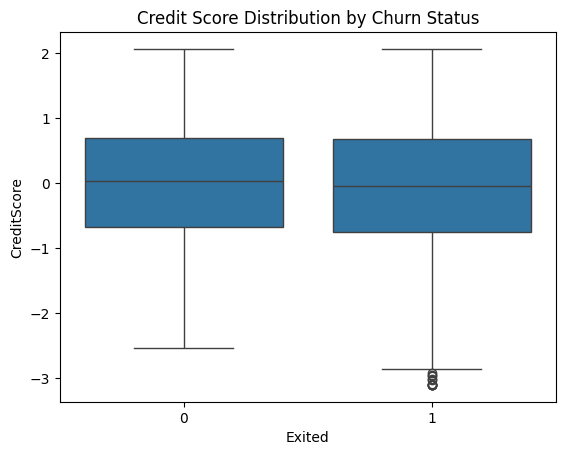

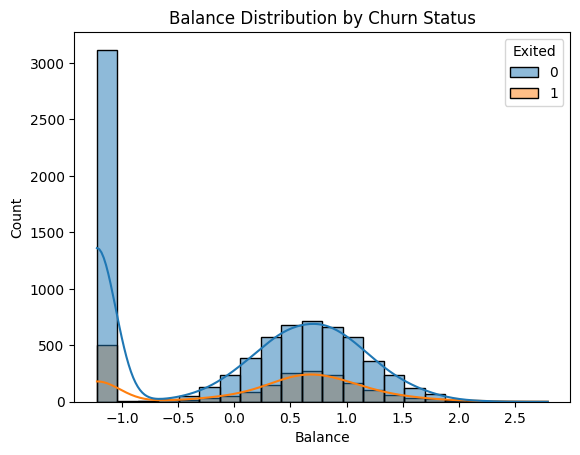

In [15]:
# Box plot of credit score by churn status
sns.boxplot(data = df, x = 'Exited', y = 'CreditScore')
plt.title('Credit Score Distribution by Churn Status')
plt.show()

# Histogram for balance by churn status 
sns.histplot(data = df, x = 'Balance', hue = 'Exited', kde = True)
plt.title('Balance Distribution by Churn Status')
plt.show()

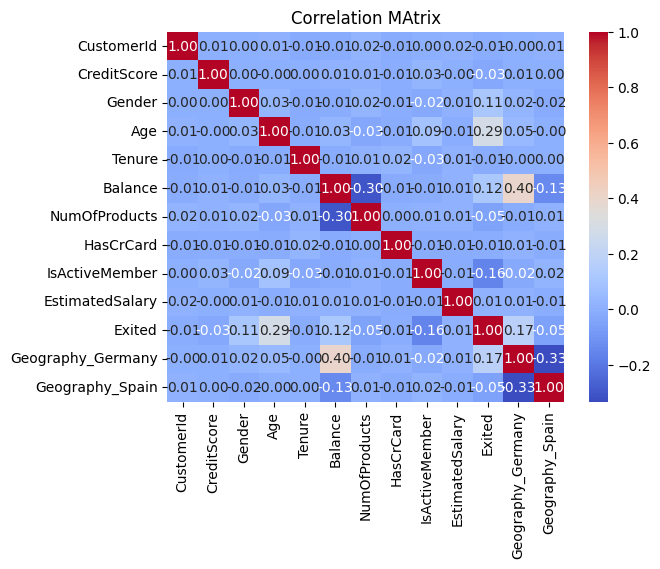

In [16]:
churn_corr = df_num.corr()
churn_corr['Exited'].sort_values(ascending= False)

sns.heatmap(churn_corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation MAtrix')
plt.show()

In [17]:
churned = df[df['Exited'] == 1]
n_churned = df[df['Exited'] == 0]

# Summarize key features for churned customers
churned_stats = churned[['CreditScore','Balance', 'NumOfProducts']].describe()
n_churned_stats = n_churned[['CreditScore','Balance', 'NumOfProducts']].describe()

print("Churned customers statistics:\n", churned_stats)
print("Non-churned customers statistics:\n", n_churned_stats)

Churned customers statistics:
        CreditScore      Balance  NumOfProducts
count  2037.000000  2037.000000    2037.000000
mean     -0.053568     0.234359       1.475209
std       1.038004     0.935355       0.801521
min      -3.109504    -1.225848       1.000000
25%      -0.750439    -0.611368       1.000000
50%      -0.046858     0.526705       1.000000
75%       0.677416     0.880649       2.000000
max       2.063884     2.795323       4.000000
Non-churned customers statistics:
        CreditScore      Balance  NumOfProducts
count  7963.000000  7963.000000    7963.000000
mean      0.013703    -0.059951       1.544267
std       0.989709     1.007272       0.509536
min      -2.540431    -1.225848       1.000000
25%      -0.678012    -1.225848       1.000000
50%       0.025569     0.249811       2.000000
75%       0.698109     0.800144       2.000000
max       2.063884     2.324683       3.000000


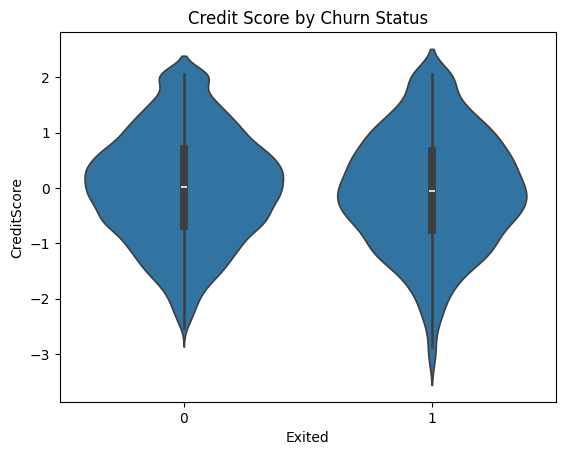

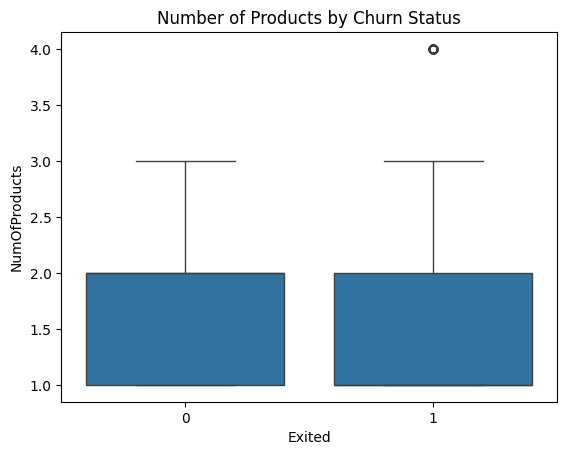

In [18]:
# Violin plot for credit score
sns.violinplot(data=df, x='Exited', y='CreditScore')
plt.title('Credit Score by Churn Status')
plt.show()

# Box plot for the number of products by churn status
sns.boxplot(data=df, x='Exited', y='NumOfProducts')
plt.title('Number of Products by Churn Status')
plt.show()

Predictive Churn Modeling

In [20]:
# Getting Target and Features
target = df_num['Exited']
features = df_num.drop(columns= 'Exited')

In [21]:
from sklearn.model_selection import train_test_split
# Splitting data for training and testing

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state= 42)



In [22]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

# Predict on the test set
y_pred_log = log_reg.predict(x_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(x_test)

In [24]:
# Get feature importance from Random Forest model
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Age                  0.222461
NumOfProducts        0.130335
Balance              0.119702
CustomerId           0.118382
EstimatedSalary      0.117614
CreditScore          0.116746
Tenure               0.067163
IsActiveMember       0.037953
Geography_Germany    0.024777
Gender               0.016759
HasCrCard            0.016224
Geography_Spain      0.011884
dtype: float64


Evaluation of results

In [26]:
from sklearn.metrics import accuracy_score
# Accuracy checking
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_log_reg = accuracy_score(y_test, y_pred_log)

print(f'Accuracy rf: {accuracy_rf} Accuracy Log Reg {accuracy_log_reg}')

Accuracy rf: 0.8635 Accuracy Log Reg 0.8035


In [27]:
from sklearn.metrics import confusion_matrix

# For Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", cm_rf)

# For Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix (Logistic Regression):\n", cm_log)


Confusion Matrix (Random Forest):
 [[1545   62]
 [ 211  182]]
Confusion Matrix (Logistic Regression):
 [[1607    0]
 [ 393    0]]


In [28]:
from sklearn.metrics import classification_report

# For Random Forest
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# For Logistic Regression
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\khyAJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khyAJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khyAJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [30]:
from sklearn.metrics import roc_auc_score

# For Random Forest
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
print("ROC-AUC Score (Random Forest):", roc_auc_rf)

# For Logistic Regression
roc_auc_log = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:, 1])
print("ROC-AUC Score (Logistic Regression):", roc_auc_log)


ROC-AUC Score (Random Forest): 0.862867765231945
ROC-AUC Score (Logistic Regression): 0.5157129036293189


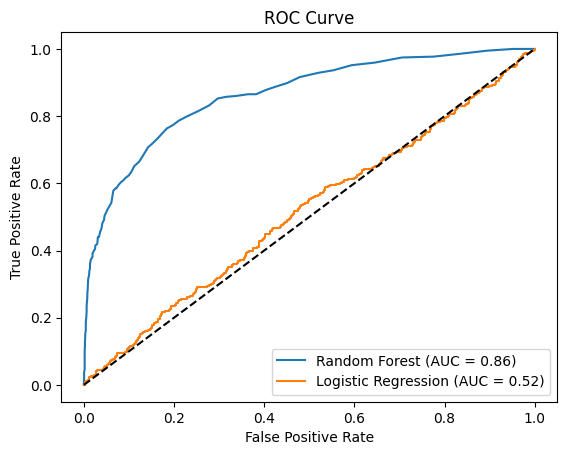

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# For Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_rf))

# For Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(x_test)[:, 1])
plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_log))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(x_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", best_params)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [33]:
# Predict on the test set using the best model
y_pred_best_rf = best_rf_model.predict(x_test)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_rf)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


Accuracy: 0.861
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1542   65]
 [ 213  180]]
